# Pymaceuticals Inc.
---
### Analysis



1. **Correlation between Mouse Weight and Tumor Volume (Capomulin Regimen):**
   - The correlation coefficient between mouse weight and the average tumor volume for the mice in the Capomulin regimen is approximately 0.83 (Pearson's correlation coefficient). This suggests a strong positive linear relationship between mouse weight and tumor volume. In other words, as mouse weight increases, the average tumor volume tends to increase as well.

2. **Effectiveness of Capomulin and Other Regimens:**
   - Capomulin and Ramicane are two drug regimens that appear to be more effective in reducing tumor volume compared to Infubinol and Ceftamin. This conclusion is drawn from the summary statistics, where Capomulin and Ramicane show lower mean and median tumor volumes and smaller variances, indicating tighter tumor volume control.

3. **Outliers in the Capomulin Regimen:**
   - When analyzing potential outliers for the Capomulin regimen, no outliers were identified based on the criteria of being below the lower bound or above the upper bound. This suggests that the data points in the Capomulin regimen do not exhibit extreme values or unusual observations in terms of tumor volume.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge( study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [22]:

# Find duplicate rows based on Mouse ID 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Extract the Mouse IDs of the duplicate mice
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

print("Duplicate mice by ID number:")
print(duplicate_mouse_ids)


Duplicate mice by ID number:
['g989']


In [27]:
# Filter the combined_data DataFrame to get all data for duplicate Mouse IDs
all_data_for_duplicate_mice = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display all the data for duplicate Mouse IDs
all_data_for_duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Get the indices of rows to remove from combined_data
indices_to_remove = all_data_for_duplicate_mice.index

# Remove the rows from combined_data using the indices
cleaned_data = combined_data.drop(indices_to_remove)


# Display the clean DataFrame
cleaned_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [30]:
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
num_mice_cleaned

248

## Summary Statistics

In [40]:
# Group the data by "Drug Regimen"
regimen_grouped = cleaned_data.groupby("Drug Regimen")

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = regimen_grouped["Tumor Volume (mm3)"].mean()
median = regimen_grouped["Tumor Volume (mm3)"].median()
var = regimen_grouped["Tumor Volume (mm3)"].var()
std = regimen_grouped["Tumor Volume (mm3)"].std()
sem = regimen_grouped["Tumor Volume (mm3)"].sem()



# Rename the columns for clarity
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Variance': var,
    'Standard Deviation': std,
    'SEM': sem
})
# Display the summary statistics DataFrame
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

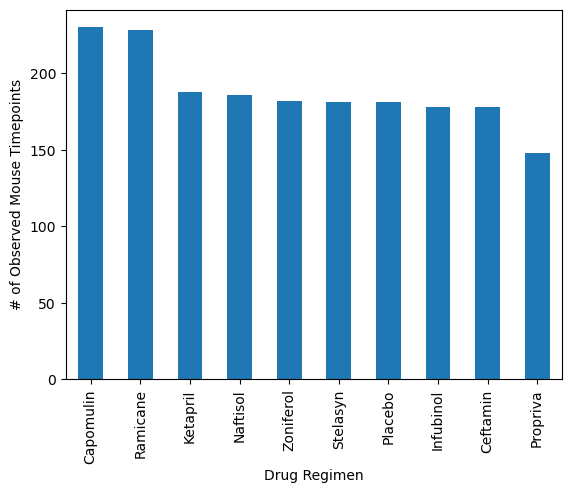

In [51]:
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot using Pandas
ax = regimen_counts.plot(kind="bar")

# Set labels and title
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")

# Show the plot
ax


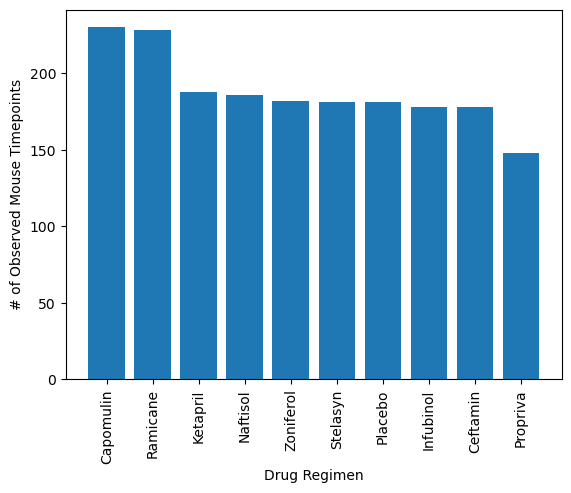

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Assuming you have the cleaned_data DataFrame
# Group the data by "Drug Regimen" and count the number of rows (Mouse ID/Timepoints)
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Create a bar plot
regimen_counts.plot(kind="bar")

# Set labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


# Show the plot
plt.show()

<Axes: ylabel='Sex'>

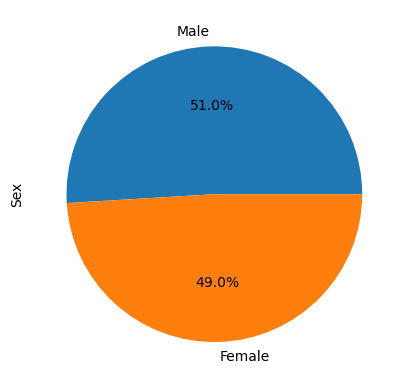

In [48]:
sex_counts = cleaned_data["Sex"].value_counts()

# Create a pie plot using Pandas
sex_counts.plot(kind="pie",autopct="%1.1f%%")


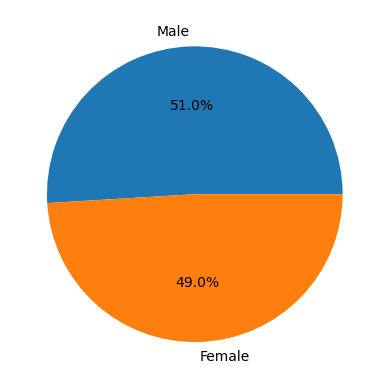

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

# Group the data by "Sex" and count the number of mice in each group
sex_counts = cleaned_data["Sex"].value_counts()

# Create a pie plot using pyplot
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [52]:
import pandas as pd

# Assuming you have the cleaned_data DataFrame
# Filter the data for the four specific treatment regimens
target_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = cleaned_data[cleaned_data["Drug Regimen"].isin(target_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge the last timepoints DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, filtered_data, on=["Mouse ID", "Timepoint"])

# Display the final tumor volume data
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [57]:
import pandas as pd

# Assuming you have the final_tumor_volume DataFrame
# List of the specified treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter the data for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Calculate the IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Locate potential outliers for the current treatment
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print information about potential outliers including the treatment name
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


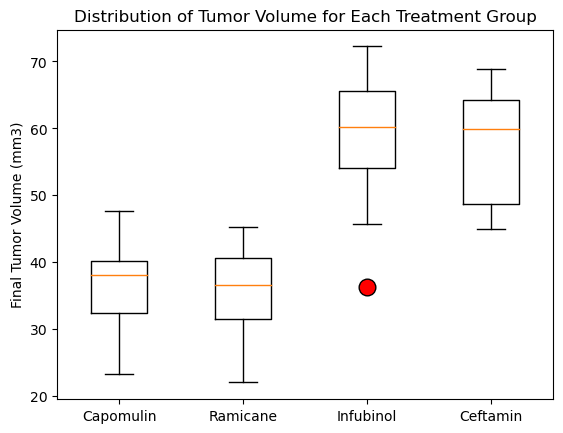

In [68]:
import matplotlib.pyplot as plt

# Assuming you have the final_tumor_volume DataFrame
# List of the specified treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a list to store tumor volume data for each treatment
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter the data for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Append the tumor volume data to the list
    tumor_vol_data.append(treatment_data)

# Create a box plot with larger red outliers bordered by black
box = plt.boxplot(tumor_vol_data, labels=treatments, sym="r")  # sym="r" adds red outliers

# Increase the size of the red outliers
for flier in box["fliers"]:
    flier.set(marker="o", markersize=12, markeredgecolor="black")  

# Set labels 
plt.ylabel("Fianl Tumor Volume (mm3)")

# Show the plot
plt.show()


## Line and Scatter Plots

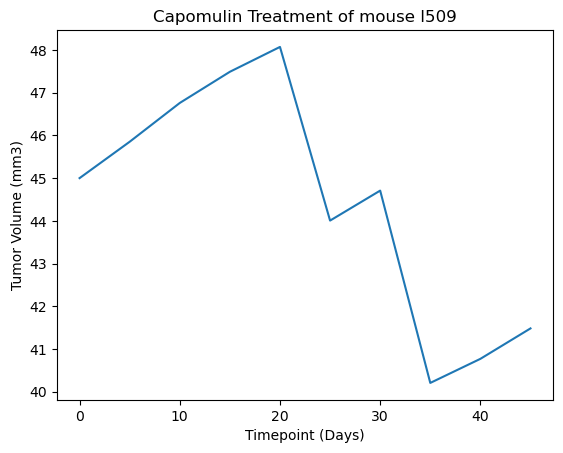

In [73]:

# Select a single mouse ID that was treated with Capomulin
selected_mouse_id = 'l509'

# Filter the data for the selected mouse treated with Capomulin
selected_mouse_data = cleaned_data[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == selected_mouse_id)]

# Create a line plot for tumor volume vs. time point
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"])

# Set labels and title
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of mouse {selected_mouse_id}")

# Show the plot
plt.show()


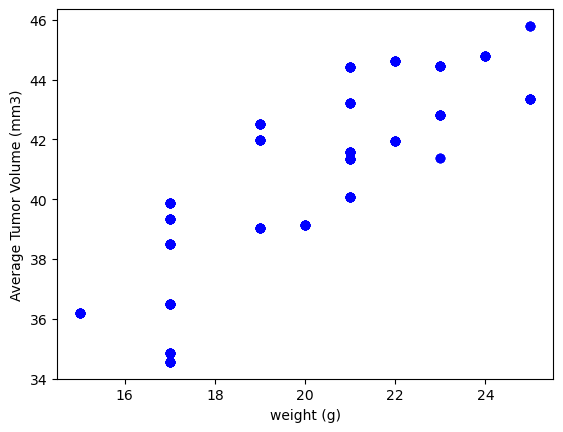

In [80]:
import matplotlib.pyplot as plt

# Assuming you have the cleaned_data DataFrame
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[["Mouse ID", "Weight (g)"]], on="Mouse ID")

# Create a scatter plot for mouse weight vs. average tumor volume
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"], facecolors="blue")

# Set labels and title
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


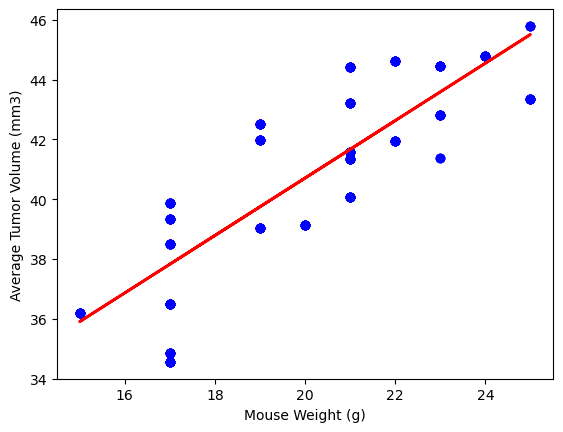

In [88]:
import matplotlib.pyplot as plt
import scipy.stats as st

# Assuming you have the merged_data DataFrame from the previous example
# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])[0]

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

# Create a scatter plot for mouse weight vs. average tumor volume
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"], facecolors="blue")

# Add the regression line to the plot
regress_line = slope * merged_data["Weight (g)"] + intercept
plt.plot(merged_data["Weight (g)"], regress_line, color="red", linewidth=2)

# Set labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()
